# CSE 574: Introduction to Machine Learning (Assignment 1) 

## 1. Load the dataset 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'adult.names'

# Initialize an empty list to hold the column names
column_names = []

# Read the file and extract column names
with open(file_path, 'r') as file:
    for line in file:
        if line.strip() and not line.startswith('|'):
            column_name = line.split(':')[0].strip()
            column_names.append(column_name)

# Print the extracted column names
print(column_names[1:])
column_names = column_names[1:]
column_names.append('income')



['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [5]:
# Load the train and test dataset
salary_data = pd.read_csv('adult.data', header=None, names=column_names)
test_data = pd.read_csv('adult.test', header=None, names=column_names)

# Display the first few rows
salary_data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Output the structure of the dataset

In [7]:
# Display basic info of the dataset
print(salary_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


There are 6 features with int64 type and 8 features with categorical type (object type).

In [9]:
# Display dimesnsions (rows and columns) of the dataset
print(salary_data.shape)

(32561, 15)


In [10]:
# Describe each column of the dataset
print(salary_data.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## 3. Clean the dataset, handle the missing values and encode the categorical values

In [12]:
# Identify duplicate rows
duplicates = salary_data[salary_data.duplicated()]
duplicate_count = duplicates.shape[0]
print("Number of duplicate rows:",duplicate_count)

duplicates = test_data[test_data.duplicated()]
duplicate_count = duplicates.shape[0]
print("Number of duplicate rows:",duplicate_count)

Number of duplicate rows: 24
Number of duplicate rows: 5


In [13]:
salary_data = salary_data.drop_duplicates()
print("Dimensions of data set after dropping duplicates:",salary_data.shape)

test_data = test_data.drop_duplicates()
print("Dimensions of data set after dropping duplicates:",test_data.shape)

Dimensions of data set after dropping duplicates: (32537, 15)
Dimensions of data set after dropping duplicates: (16277, 15)


In [14]:
# Count missing values in train and test data
missing_values_count_train = salary_data.isnull().sum()
print("The number of missing values for each feature in training dataset:\n",missing_values_count_train)

missing_values_count_test = test_data.isnull().sum()
print("The number of missing values for each feature in testing dataset:\n",missing_values_count_test)

test_data = test_data.dropna()

The number of missing values for each feature in training dataset:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
The number of missing values for each feature in testing dataset:
 age               0
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
income            1
dtype: int64


There is no feature with missing value in training data. So, there is no need to handle them.
Removed the null values in test data.

In [16]:
# There are some null values in the form of ' ?'
print("The number of missing values('?') in training dataset:\n",salary_data.isin([' ?']).sum())
print("The number of missing values('?') in testing dataset:\n",test_data.isin([' ?']).sum())

The number of missing values('?') in training dataset:
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64
The number of missing values('?') in testing dataset:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


- Train data: There are a total of 1,836 ' ?' entries in the workclass, 1,843 ' ?' entries in occupation, and 583 ' ?' entries in native-country.
- Test data:  There are a total of 963 ' ?' entries in the workclass, 966 ' ?' entries in occupation and 274 ' ?' entries in native-country.

In [18]:
# Calculate the percentage of '?' in whole data
print("Train Data:\n",(salary_data.isin([' ?']).sum()/salary_data.shape[0])*100)
print("Test Data:\n",(test_data.isin([' ?']).sum()/test_data.shape[0])*100)

Train Data:
 age               0.000000
workclass         5.642807
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.664321
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.788733
income            0.000000
dtype: float64
Test Data:
 age               0.000000
workclass         5.916687
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.935119
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.683460
income            0.000000
dtype: float64


Since the percentages of missing values are relatively low, especially native-country, proceeding with imputation without significantly impacting dataset's integrity.

- **workclass and occupation:** Replacing missing values with the mode (most frequent category). This preserves the dataset's size and allows for maintaining distribution.

- **native-country:** Created a new category like "Unknown" for these missing values.

In [20]:
# Replace '?' with NaN
salary_data['workclass'] = salary_data['workclass'].replace(' ?', pd.NA)
salary_data['occupation'] = salary_data['occupation'].replace(' ?', pd.NA)
salary_data['native-country'] = salary_data['native-country'].replace(' ?', pd.NA)

# Impute workclass and occupation with mode
salary_data['workclass'] = salary_data['workclass'].fillna(salary_data['workclass'].mode()[0])
salary_data['occupation'] = salary_data['occupation'].fillna(salary_data['occupation'].mode()[0])

# create a new category for native-country
salary_data['native-country'] = salary_data['native-country'].replace(pd.NA, 'Unknown')

# Verify that there are no more missing values
print("Number of '?' values in train data after handling them",salary_data.isin([' ?']).sum())

# Repeat same steps for test_data
# Replace '?' with NaN
test_data['workclass'] = test_data['workclass'].replace(' ?', pd.NA)
test_data['occupation'] = test_data['occupation'].replace(' ?', pd.NA)
test_data['native-country'] = test_data['native-country'].replace(' ?', pd.NA)

# Impute workclass and occupation with mode
test_data['workclass'] = test_data['workclass'].fillna(test_data['workclass'].mode()[0])
test_data['occupation'] = test_data['occupation'].fillna(test_data['occupation'].mode()[0])

# create a new category for native-country
test_data['native-country'] = test_data['native-country'].replace(pd.NA, 'Unknown')

# Convert all float columns to int
float_cols = test_data.select_dtypes(include=['float64']).columns
test_data[float_cols] = test_data[float_cols].astype('int64')

# Display the DataFrame info after conversion
print("\nAfter conversion:")
print(test_data.info())

# Verify that there are no more missing values
print("Number of '?' values in test data after handling them",test_data.isin([' ?']).sum())


Number of '?' values in train data after handling them age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

After conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 16276 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16276 non-null  object
 1   workclass       16276 non-null  object
 2   fnlwgt          16276 non-null  int64 
 3   education       16276 non-null  object
 4   education-num   16276 non-null  int64 
 5   marital-status  16276 non-null  object
 6   occupation      16276 non-null  object
 7   relationship    16276 non-null  object
 8   race            16276 non-null  object
 9   sex             1627

There are no missing value, so proceeding with label encoding for object datatype columns.

'workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country' and 'income' are the categorical features.

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoders = {}
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country', 'income']

for col in categorical_columns:
    le = LabelEncoder()
    salary_data[col] = le.fit_transform(salary_data[col])
    label_encoders[col] = le

print(salary_data.head())


for col in categorical_columns:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])
    label_encoders[col] = le

print(test_data.head())

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          6   77516          9             13               4   
1   50          5   83311          9             13               2   
2   38          3  215646         11              9               0   
3   53          3  234721          1              7               2   
4   28          3  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              13              38       0  
2              40   

In [24]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  int32
 2   fnlwgt          32537 non-null  int64
 3   education       32537 non-null  int32
 4   education-num   32537 non-null  int64
 5   marital-status  32537 non-null  int32
 6   occupation      32537 non-null  int32
 7   relationship    32537 non-null  int32
 8   race            32537 non-null  int32
 9   sex             32537 non-null  int32
 10  capital-gain    32537 non-null  int64
 11  capital-loss    32537 non-null  int64
 12  hours-per-week  32537 non-null  int64
 13  native-country  32537 non-null  int32
 14  income          32537 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


## 4. Explore the data to understand better, for example, draw a bar plot to identify the distributionn of the population in the dataset by age, followed by distribution of incomeby genderer. 

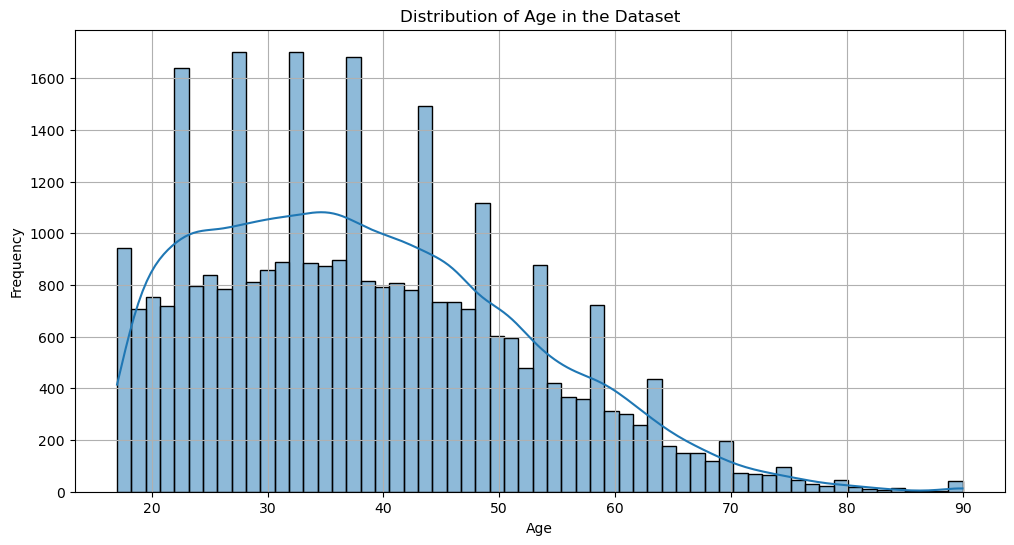

In [26]:
# Plotting the distribution of age
plt.figure(figsize=(12, 6))
sns.histplot(salary_data['age'], kde=True)
plt.title('Distribution of Age in the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


#### Insights:
- The distribution is right-skewed with more peaks in left side indicating that people in age range 20 to 45 are working more compared to old people.
- Having more than one peak in this graph would be indicative of different age groups or even generations in this data..

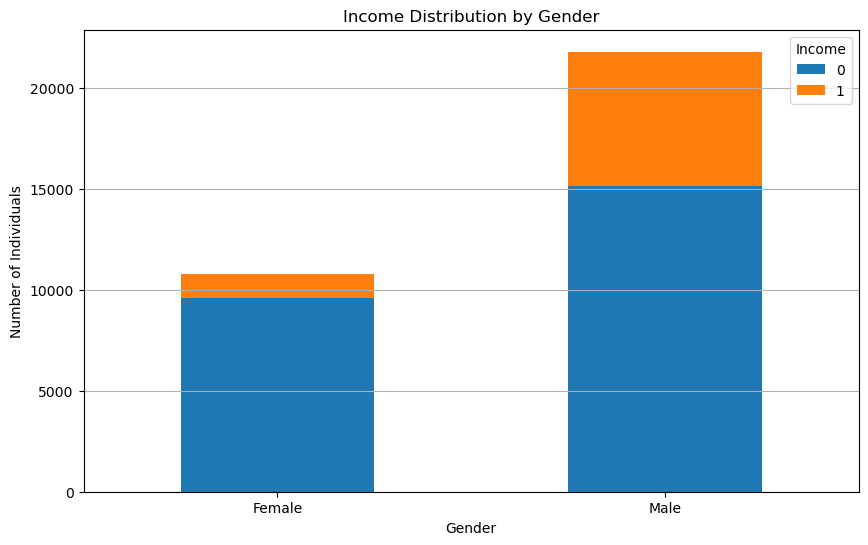

In [28]:
# Count the number of occurrences of each income category by gender
income_gender_counts = salary_data.groupby(['sex', 'income']).size().unstack()

# Plotting the income distribution by gender
ax = income_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set x-axis labels to "Female" and "Male"
ax.set_xticklabels(['Female', 'Male'])

plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Income')
plt.grid(axis='y')
plt.show()


#### Insights:
- Indeed, from this graph one can clearly see that there is a big difference in income distribution between genders: in the higher income bracket-incomes equal to 1-many more males are represented rather than females; in the lower income bracket-income equals to 0-more females than males.
- The distribution of the bars would suggest that more males are in the higher income category. This could be indicative of a gender gap in returns.
- The blue portion of the bar for females is greater than that for males. Therefore, the height of the bar indicates that more females are in the lower bracket of income.

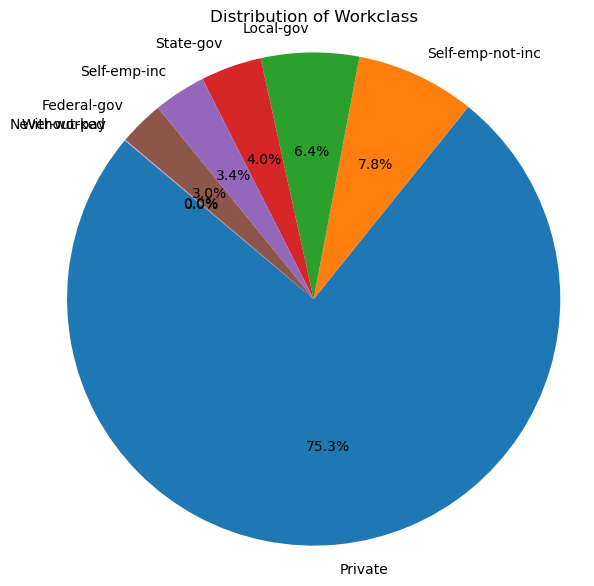

In [30]:
# Count the number of individuals in each workclass
workclass_counts = salary_data['workclass'].value_counts()

# Create a mapping of encoded values to original workclass names
encoded_workclass_mapping = {
    3: 'Private',
    5: 'Self-emp-not-inc',
    1: 'Local-gov',
    6: 'State-gov',
    4: 'Self-emp-inc',
    0: 'Federal-gov',
    7: 'Without-pay',
    2: 'Never-worked'
}

# Get the original workclass names based on the counts' index
original_workclass_names = workclass_counts.index.map(encoded_workclass_mapping)

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(workclass_counts, labels=original_workclass_names, autopct='%1.1f%%', startangle=140)

# Set the title and ensure equal aspect ratio
plt.title('Distribution of Workclass')
plt.axis('equal')
plt.show()


#### Insights:
- Private Sector Dominance: The "Private" workclass dominates the workclass, with 75.3% of the people in this dataset from this workclass; thus, the private sector dominates in employing people in the population under consideration.- 
Other Workclasses: Smaller Proportions in Public and Self-Employed Sectors The other work classes, "State-gov", "Federal-gov", "Self-emp-inc", "Self-emp-not-inc", "Without-pay", and "Never-worked", all relatively represent a smaller proportion of the whole data set. This further indicates the insignificance of these sectors in the overall contributions of the labor forces
- 
Minimum Without-Pay and Never Worked Classes: The classes "Without-pay" and "Never-worked" are of very minor percentage, 3.0% and 0.0%, respectively, indicating that unemployment and never having worked is relatively rare in most of the dataset.

<Figure size 1200x600 with 0 Axes>

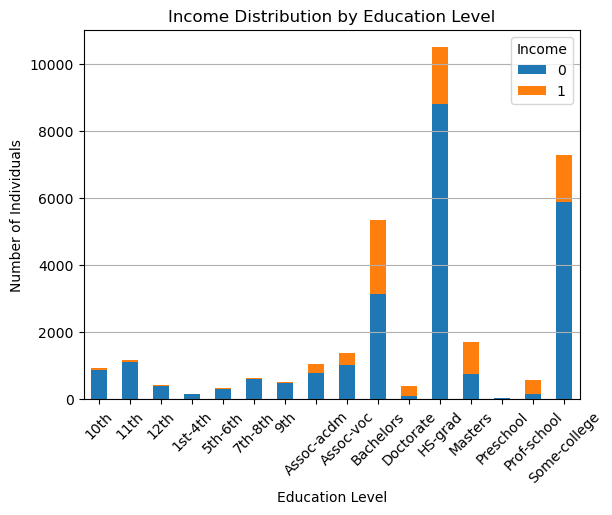

In [32]:
#Income Distribution by Education Level
income_education_counts = salary_data.groupby(['education', 'income']).size().unstack()

plt.figure(figsize=(12, 6))
ax=income_education_counts.plot(kind='bar', stacked=True)

ax.set_xticklabels(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 
                    'Masters', 'Preschool', 'Prof-school', 'Some-college'])
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.grid(axis='y')
plt.show()


#### Insights:
- Higher Education, Higher Income: Education level is positively correlated with income.
- Exceptions at Higher Levels: Factors beyond education can influence income.
- Lower Education, Lower Income: Lower education levels are associated with lower income.

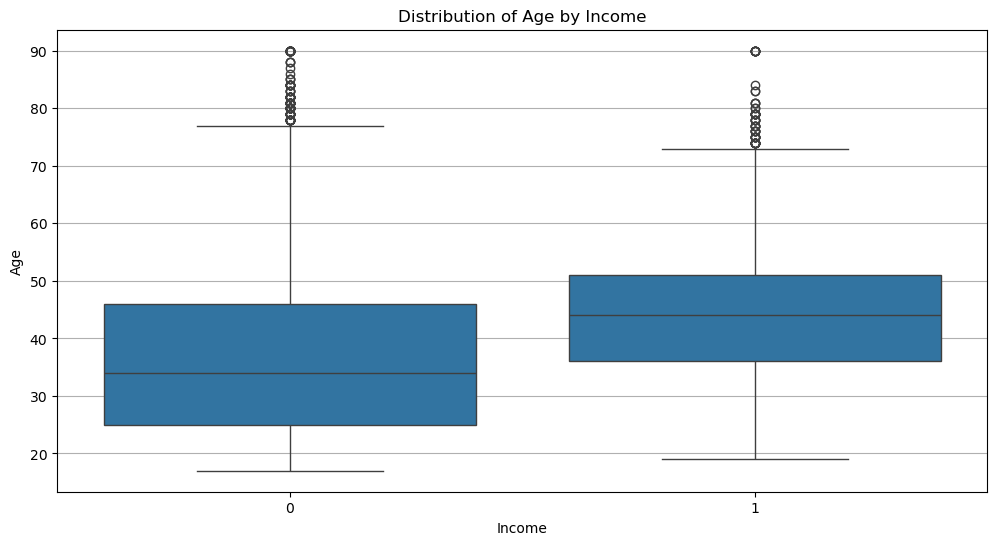

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=salary_data, x='income', y='age')
plt.title('Distribution of Age by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()


#### Insights:
- The median age for individuals with income <=$50K (income = 0) is lower than the median age for those with income >$50K (income = 1). This suggests that, on average, individuals in the higher income bracket tend to be older.
- There are a few outliers, particularly in the higher income group, suggesting that some individuals in this group are significantly older or younger than the majority.

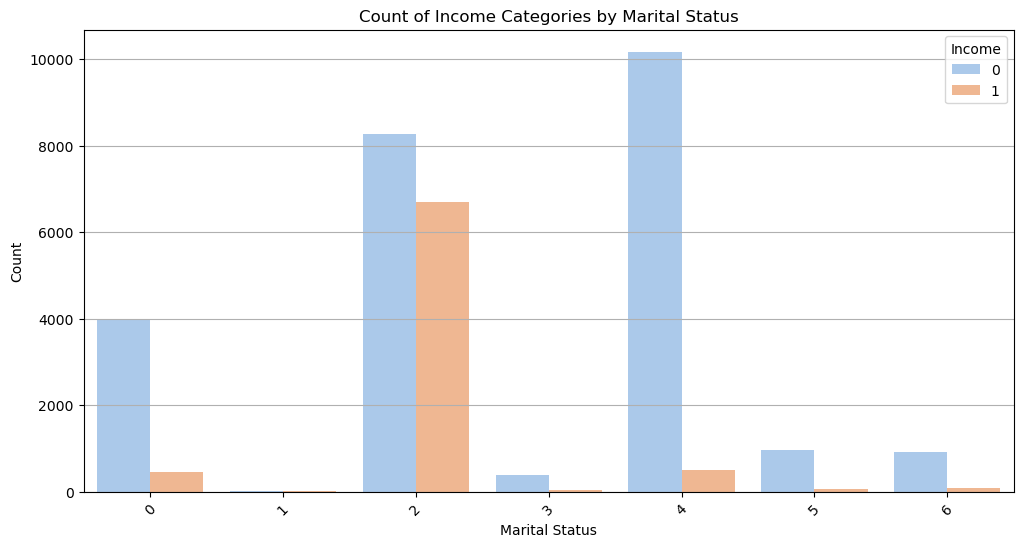

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=salary_data, x='marital-status', hue='income', palette='pastel')
plt.title('Count of Income Categories by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.grid(axis='y')
plt.show()


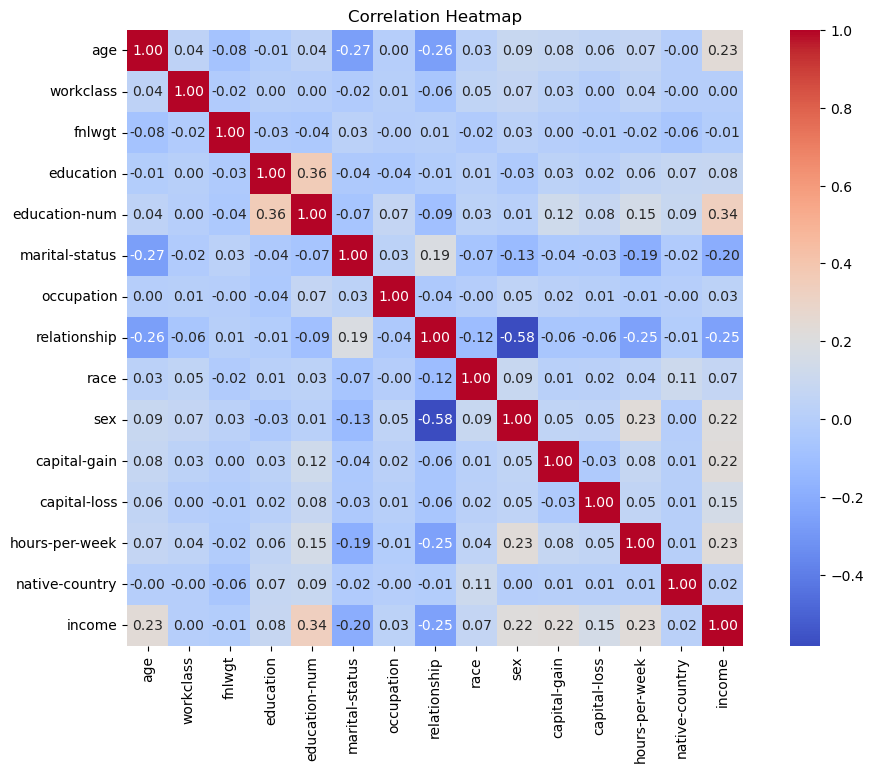

In [37]:
# Calculate the correlation matrix
corr = salary_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()


#### Insights:
- Strong positive correlations: Education and income, age and hours worked.
- Strong negative correlations: Marital status and income, relationship and income.
- Weak or no correlations: Gender and income, race and income.

## 5. Apply predictive modeling to the data to predict whether an individual earns more than $50K a year.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Split into features and target variable
X_train = salary_data.iloc[:, :-1]
y_train = salary_data['income']

X_test = test_data.iloc[:,:-1]
y_test = test_data['income']


print(X_train.head())
print(X_test.head())

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          6   77516          9             13               4   
1   50          5   83311          9             13               2   
2   38          3  215646         11              9               0   
3   53          3  234721          1              7               2   
4   28          3  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  native-country  
0              40              38  
1              13              38  
2              40              38  
3       

In [41]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.7989678053575817
Confusion Matrix:
 [[12408    22]
 [ 3250   596]]


In [42]:
# Initialize the Gradient Boosting Classifier model
grad_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
grad_model.fit(X_train, y_train)

# Make predictions
y_pred = grad_model.predict(X_test)
y_pred_grad = y_pred

# Evaluate the model
grad_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", grad_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8660604571147702
Confusion Matrix:
 [[11822   608]
 [ 1572  2274]]


In [43]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
dt_acc = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8092283116244777
Confusion Matrix:
 [[10804  1626]
 [ 1479  2367]]


In [44]:
# Initialize the Random Forest model
ran_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
ran_model.fit(X_train, y_train)

# Make predictions
y_pred = ran_model.predict(X_test)

# Evaluate the model
ran_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", ran_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8553084295895798
Confusion Matrix:
 [[11585   845]
 [ 1510  2336]]


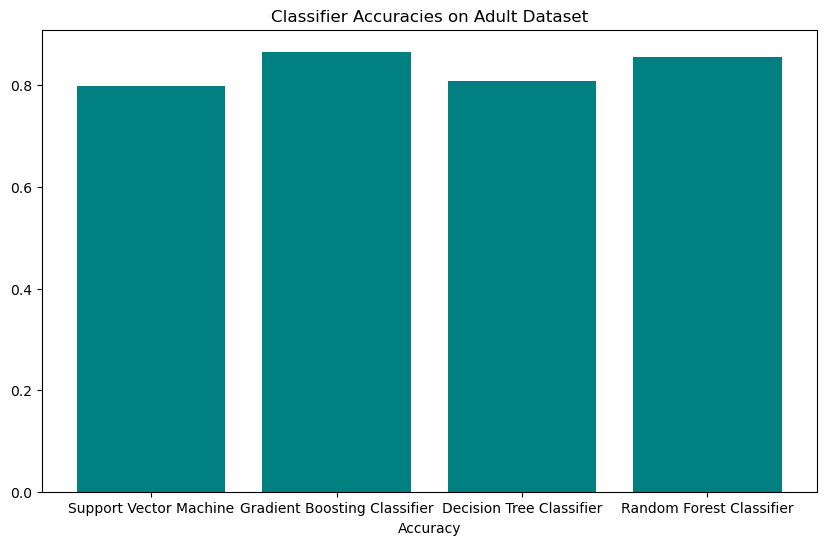

In [45]:
# Plotting the accuracies
results = {
    "Support Vector Machine": svm_acc,
    "Gradient Boosting Classifier": grad_acc,
    "Decision Tree Classifier": dt_acc,
    "Random Forest Classifier":ran_acc
}
plt.figure(figsize=(10, 6))
plt.bar(list(results.keys()), list(results.values()), color='teal')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracies on Adult Dataset')
plt.show()

#### Conclusion:
This project successfully analyzed the Census Income dataset to predict whether individuals earn over USD 50,000 per year. Through data cleaning, preprocessing, and the application of various machine learning models, achieved a satisfactory level of accuracy of 86.67% in predictions (through Gradient Boost Classifier). 


## Predicted vs. Actual Income Distribution: A Comparative Analysis

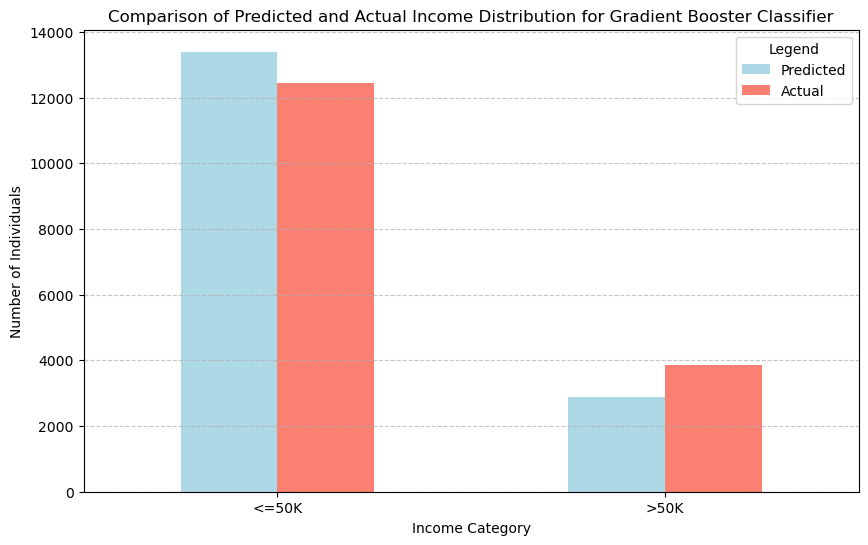

In [48]:
y_pred_income = pd.Series(y_pred_grad).map({0: '<=50K', 1: '>50K'})
y_test_income = pd.Series(y_test).map({0: '<=50K', 1: '>50K'})

# Count the occurrences of each category for both predicted and actual
predicted_counts = y_pred_income.value_counts()
actual_counts = y_test_income.value_counts()

# Create a DataFrame for better plotting
comparison_df = pd.DataFrame({
    'Predicted': predicted_counts,
    'Actual': actual_counts
}).fillna(0)

# Plotting
comparison_df.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Comparison of Predicted and Actual Income Distribution for Gradient Booster Classifier')
plt.xlabel('Income Category')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Legend')
plt.show()
